In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!pip install fastai
from fastai.vision import *

    100% |████████████████████████████████| 153kB 6.4MB/s 
    100% |████████████████████████████████| 112kB 24.2MB/s 
    100% |████████████████████████████████| 591.8MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61bba000 @  0x7f98d3bfe2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 20.3MB/s 
  Running setup.py bdist_wheel for nvidia-ml-py3 ... - done
  Stored in directory: /root/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
  Running setup.py bdist_wheel for bottleneck ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
Successfully built nvidia-ml-py3 bottleneck
torchvision 0.

In [31]:
fastai.__version__

NameError: ignored

In [0]:

#URL = 'https://s3.amazonaws.com/fast-ai-imageclas/stanford-cars' # removed .tgz from the String
URL = URLs.CIFAR

In [0]:
path = untar_data(URL)

In [18]:
path.ls()


[PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt')]

In [0]:
path_train = path/'train'
path_test = path/'test'


In [23]:
path_train.ls()

[PosixPath('/root/.fastai/data/cifar10/train/horse'),
 PosixPath('/root/.fastai/data/cifar10/train/frog'),
 PosixPath('/root/.fastai/data/cifar10/train/cat'),
 PosixPath('/root/.fastai/data/cifar10/train/ship'),
 PosixPath('/root/.fastai/data/cifar10/train/bird'),
 PosixPath('/root/.fastai/data/cifar10/train/dog'),
 PosixPath('/root/.fastai/data/cifar10/train/deer'),
 PosixPath('/root/.fastai/data/cifar10/train/airplane'),
 PosixPath('/root/.fastai/data/cifar10/train/truck'),
 PosixPath('/root/.fastai/data/cifar10/train/automobile')]

fnames = get_image_files(path_train)

fnames

path_train.ls()

In [0]:
bs = 64
img_size = 224
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid = 'test', size = img_size, bs=bs).normalize(imagenet_stats)

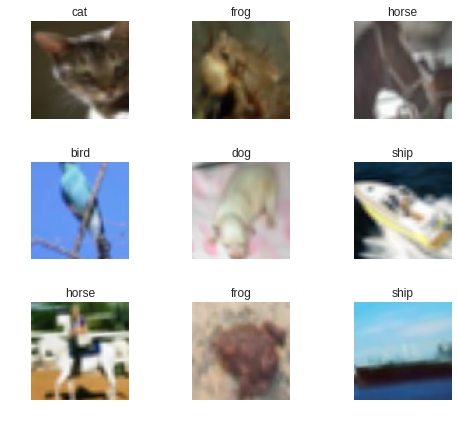

In [27]:
data.show_batch(rows = 3, figsize = (7, 6))

In [0]:
np.random.seed(2)
pat = re.compile(r'/([.]?)\d+.jpg$')

bs = 64
data = ImageDataBunch.from_name_re(path_train, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [28]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

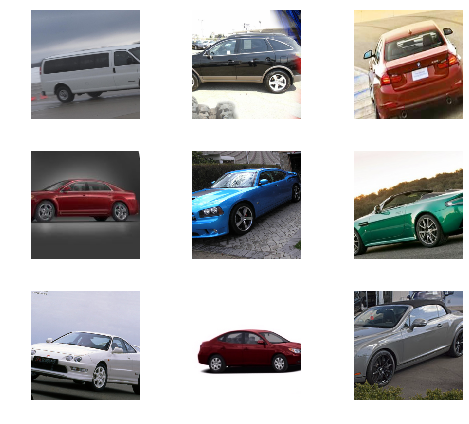

In [10]:
data.show_batch(rows = 3, figsize = (7, 6))

In [0]:
data.classes

In [15]:
import scipy.io
file_annot = path/'cars_annos.mat'
mat = scipy.io.loadmat(file_annot)

np.array(mat)

array({'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Feb 28 19:34:55 2015', '__version__': '1.0', '__globals__': [], 'annotations': array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000004.jpg'], dtype='<U18'), array([[33]], dtype=uint8), array([[50]], dtype=uint8), array([[197]], dtype=uint8), array([[150]], dtype=uint8), arr

In [29]:
learner = create_cnn(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 26507340.20it/s]


In [30]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.395205,0.271778,0.096400


In [0]:
learner.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

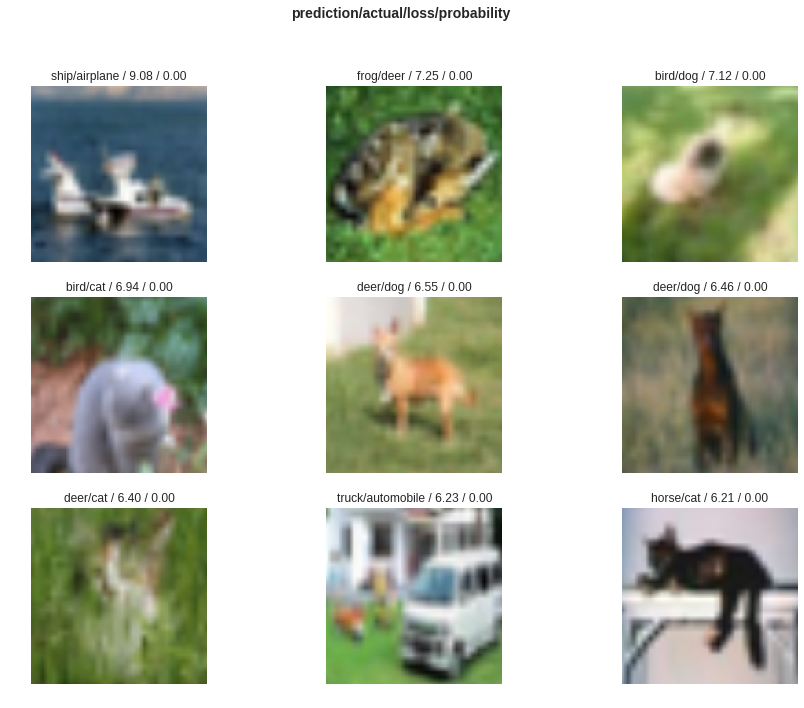

In [34]:
interp.plot_top_losses(9, figsize=(15, 11))

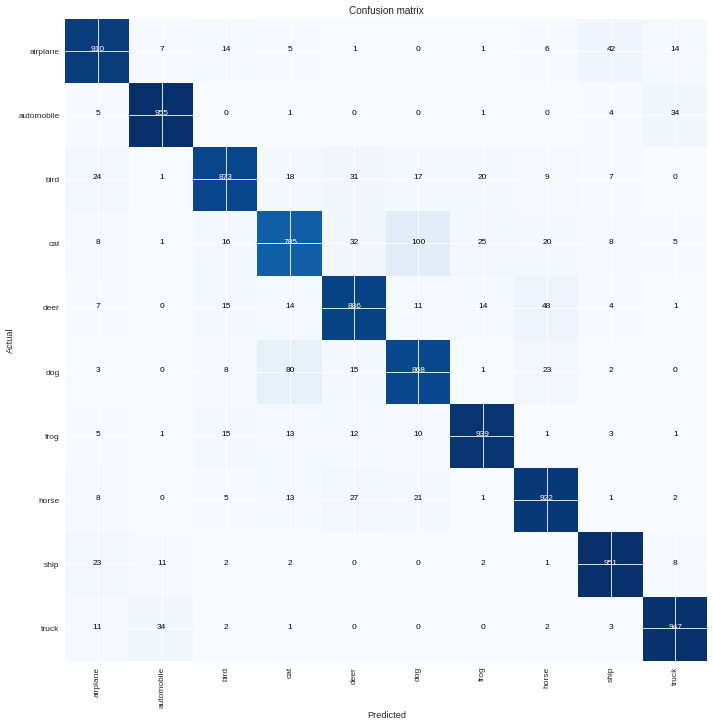

In [35]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi = 60)